In [244]:
# Librerie base
import numpy as np
import pandas as pd

# Visualizzazione
import matplotlib.pyplot as plt  
import seaborn as sns

# Modelli statistici
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

# Libreria ISLP (Statistical Learning)
from ISLP import load_data
from ISLP.models import (ModelSpec as MS ,summarize, poly)

# Simple Linear Regression
We will use the Boston housing dataset, contained in the ISLP package. The Boston dataset records the medv (average house value) for 506 neighbourhoods around Boston.

In [245]:
# carico il dataset e stampo l'head
f1 = pd.read_csv("f1_pitstops_2018_2024.csv", encoding='utf-8')

In [246]:
f1.columns

Index(['Season', 'Round', 'Circuit', 'Driver', 'Constructor', 'Laps',
       'Position', 'TotalPitStops', 'AvgPitStopTime', 'Race Name', 'Date',
       'Time_of_race', 'Location', 'Country', 'Air_Temp_C', 'Track_Temp_C',
       'Humidity_%', 'Wind_Speed_KMH', 'Lap Time Variation', 'Total Pit Stops',
       'Tire Usage Aggression', 'Fast Lap Attempts', 'Position Changes',
       'Driver Aggression Score', 'Abbreviation', 'Stint', 'Tire Compound',
       'Stint Length', 'Pit_Lap', 'Pit_Time'],
      dtype='object')

In [247]:
#look at the first 5 rows in the datasets
f1.head()

,Season,Round,Circuit,Driver,Constructor,Laps,Position,TotalPitStops,AvgPitStopTime,Race Name,...,Tire Usage Aggression,Fast Lap Attempts,Position Changes,Driver Aggression Score,Abbreviation,Stint,Tire Compound,Stint Length,Pit_Lap,Pit_Time
0,2018,1,Albert Park Grand Prix Circuit,Sebastian Vettel,Ferrari,58,1,1,21.787,Australian Grand Prix,...,0.017241,44.76882,0.000000,6.755003,VET,1.0,ULTRASOFT,25.0,26.0,21.787
1,2018,1,Albert Park Grand Prix Circuit,Sebastian Vettel,Ferrari,58,1,1,21.787,Australian Grand Prix,...,0.017241,44.76882,0.000000,6.755003,VET,2.0,SOFT,32.0,NaN,Final Stint
2,2018,1,Albert Park Grand Prix Circuit,Lewis Hamilton,Mercedes,58,2,1,21.821,Australian Grand Prix,...,0.017241,44.73482,0.043478,6.754254,HAM,1.0,ULTRASOFT,17.0,19.0,21.821
3,2018,1,Albert Park Grand Prix Circuit,Lewis Hamilton,Mercedes,58,2,1,21.821,Australian Grand Prix,...,0.017241,44.73482,0.043478,6.754254,HAM,2.0,SOFT,39.0,NaN,Final Stint
4,2018,1,Albert Park Grand Prix Circuit,Kimi RÃƒÂ¤ikkÃƒÂ¶nen,Ferrari,58,3,1,21.421,Australian Grand Prix,...,0.017241,45.13482,0.086957,6.818562,RAI,1.0,ULTRASOFT,17.0,18.0,21.421


In [248]:
print(f1.describe())

            Season        Round         Laps     Position  TotalPitStops  \
count  7374.000000  7374.000000  7374.000000  7374.000000    7374.000000   
mean   2021.308245    10.673312    56.643748    10.156089       2.068348   
std       1.969604     6.135126    13.922667     5.590062       1.135088   
min    2018.000000     1.000000     0.000000     1.000000       0.000000   
25%    2020.000000     5.000000    52.000000     5.000000       1.000000   
50%    2021.000000    11.000000    57.000000    10.000000       2.000000   
75%    2023.000000    15.000000    66.000000    15.000000       3.000000   
max    2024.000000    24.000000    87.000000    20.000000       7.000000   

       AvgPitStopTime   Air_Temp_C  Track_Temp_C   Humidity_%  Wind_Speed_KMH  \
count     7189.000000  7001.000000   7001.000000  7001.000000     7001.000000   
mean       120.109095    19.520345     25.207104    67.576191       11.434032   
std        268.723688     5.092982      5.195562    14.157319        6.0

In [249]:
# Controllo i dati nulli
columnsWithNulls=f1.isnull().sum().sort_values(ascending=False)
columnsWithNulls=columnsWithNulls[columnsWithNulls>0]
print(columnsWithNulls)

Pit_Lap                    2810
Track_Temp_C                373
Date                        373
Wind_Speed_KMH              373
Humidity_%                  373
Air_Temp_C                  373
Country                     373
Location                    373
Time_of_race                373
Race Name                   373
Pit_Time                    281
AvgPitStopTime              185
Lap Time Variation          185
Driver Aggression Score     185
Fast Lap Attempts           185
Stint Length                109
Tire Compound               109
Stint                       109
Tire Usage Aggression        66
dtype: int64


Pit_Lap                    38.106862
Wind_Speed_KMH              5.058313
Date                        5.058313
Time_of_race                5.058313
Location                    5.058313
Country                     5.058313
Air_Temp_C                  5.058313
Track_Temp_C                5.058313
Humidity_%                  5.058313
Race Name                   5.058313
Pit_Time                    3.810686
Fast Lap Attempts           2.508815
Driver Aggression Score     2.508815
Lap Time Variation          2.508815
AvgPitStopTime              2.508815
Stint                       1.478167
Tire Compound               1.478167
Stint Length                1.478167
Tire Usage Aggression       0.895037
dtype: float64


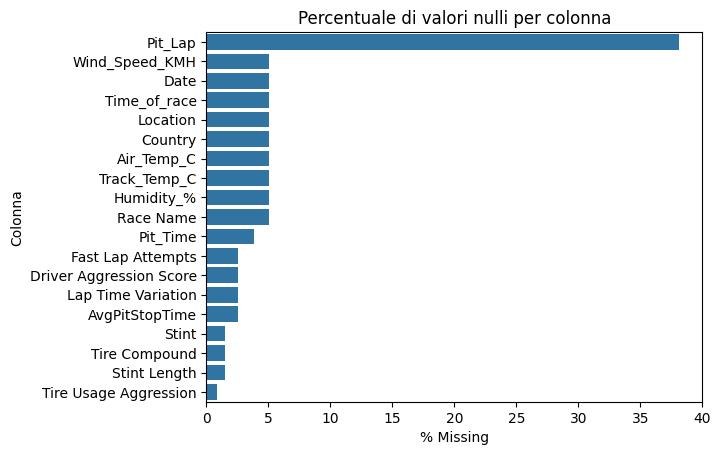

In [250]:
# Controllo in percentuale quanti dati mancano così da capire come trattarli, pongo una soglia di eliminazione del regressore nel caso di +30% di dati mancanti
missing_pct = f1.isnull().mean() * 100
missing_only = missing_pct[missing_pct > 0].sort_values(ascending=False)
print(missing_only)
sns.barplot(x=missing_only.values, y=missing_only.index)
plt.title('Percentuale di valori nulli per colonna')
plt.xlabel('% Missing')
plt.ylabel('Colonna')
plt.show()

In [251]:
#droppiamo le righe con i valori nulli e le colonne con più del 30% di dati nulli
f1.dropna(axis=0, inplace=True)
f1.drop(columns=missing_only[missing_only>30].index, inplace=True)
f1.isnull().sum()

Season                     0
Round                      0
Circuit                    0
Driver                     0
Constructor                0
Laps                       0
Position                   0
TotalPitStops              0
AvgPitStopTime             0
Race Name                  0
Date                       0
Time_of_race               0
Location                   0
Country                    0
Air_Temp_C                 0
Track_Temp_C               0
Humidity_%                 0
Wind_Speed_KMH             0
Lap Time Variation         0
Total Pit Stops            0
Tire Usage Aggression      0
Fast Lap Attempts          0
Position Changes           0
Driver Aggression Score    0
Abbreviation               0
Stint                      0
Tire Compound              0
Stint Length               0
Pit_Time                   0
dtype: int64

## Data processing

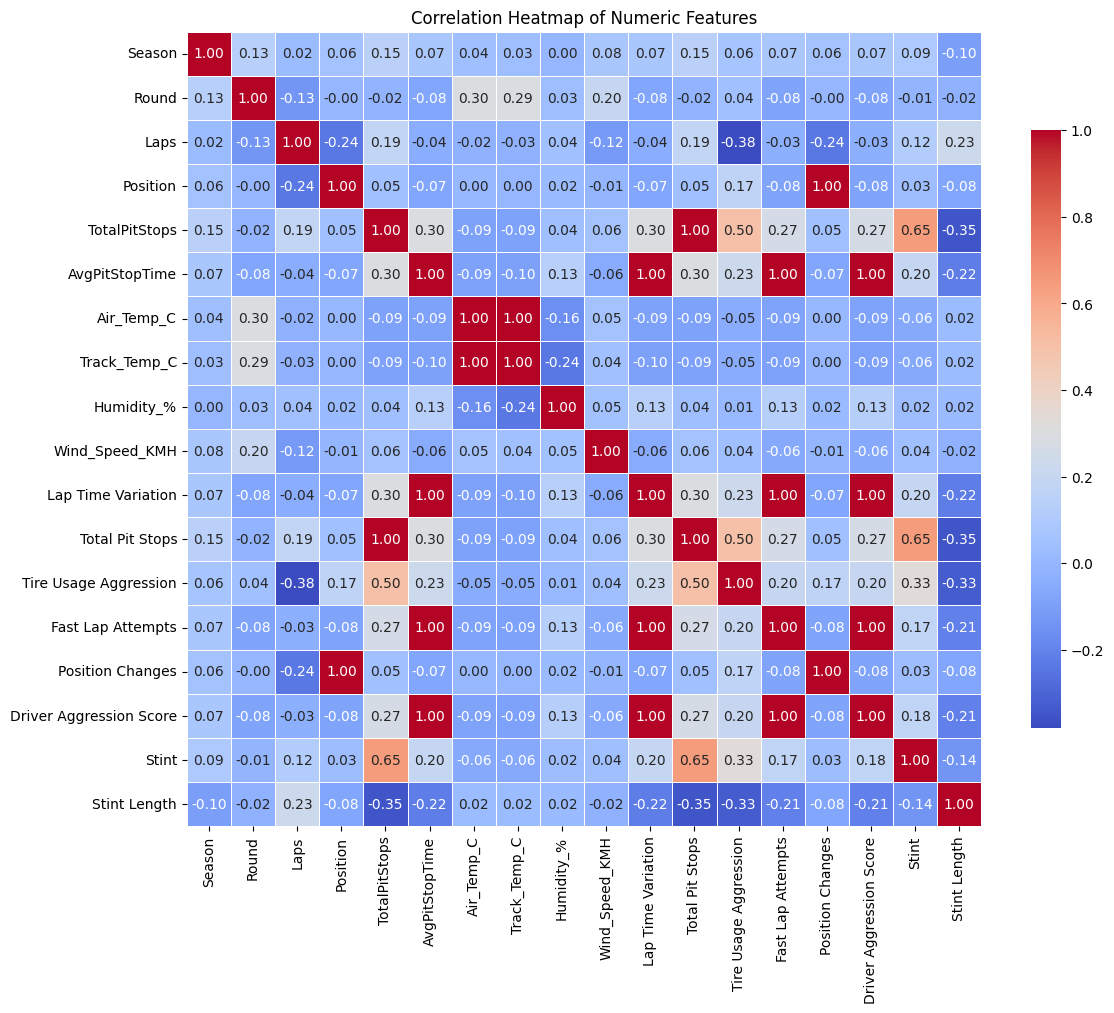

In [252]:
# Seleziona le colonne numeriche
numeric_f1 = f1.select_dtypes(include=[np.number])

# Controllo che ci siano almeno 4 variabili numeriche per evitare visualizzazioni poco utili
if numeric_f1.shape[1] >= 4:
    # Calcola la matrice di correlazione
    corr = numeric_f1.corr()
    
    # Imposta la figura
    plt.figure(figsize=(12, 10))
    sns.heatmap(
        corr,
        annot=True,
        fmt='.2f',
        cmap='coolwarm',
        square=True,
        linewidths=.5,
        cbar_kws={"shrink": .75}
    )
    plt.title('Correlation Heatmap of Numeric Features')
    plt.tight_layout()
    plt.show()
else:
    print('Not enough numeric columns for a meaningful correlation heatmap')

In [253]:
columns_to_drop = ['Position Changes', 'Total Pit Stops', 'Fast Lap Attempts', 'Lap Time Variation', 'Air_Temp_C', 'AvgPitStopTime']
f1.drop(columns=columns_to_drop, inplace=True)

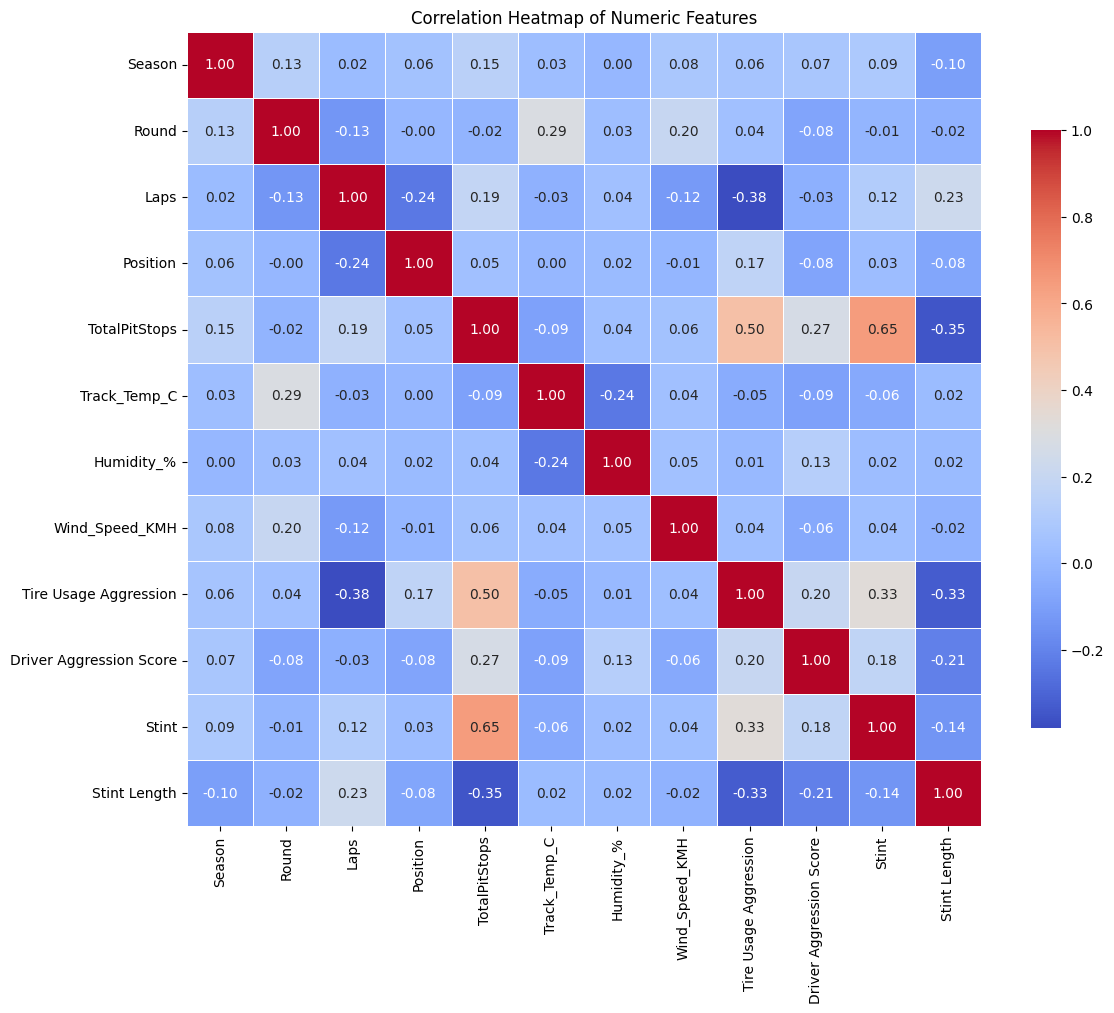

In [254]:
# Seleziona le colonne numeriche
numeric_f1 = f1.select_dtypes(include=[np.number])

# Controllo che ci siano almeno 4 variabili numeriche per evitare visualizzazioni poco utili
if numeric_f1.shape[1] >= 4:
    # Calcola la matrice di correlazione
    corr = numeric_f1.corr()
    
    # Imposta la figura
    plt.figure(figsize=(12, 10))
    sns.heatmap(
        corr,
        annot=True,
        fmt='.2f',
        cmap='coolwarm',
        square=True,
        linewidths=.5,
        cbar_kws={"shrink": .75}
    )
    plt.title('Correlation Heatmap of Numeric Features')
    plt.tight_layout()
    plt.show()
else:
    print('Not enough numeric columns for a meaningful correlation heatmap')

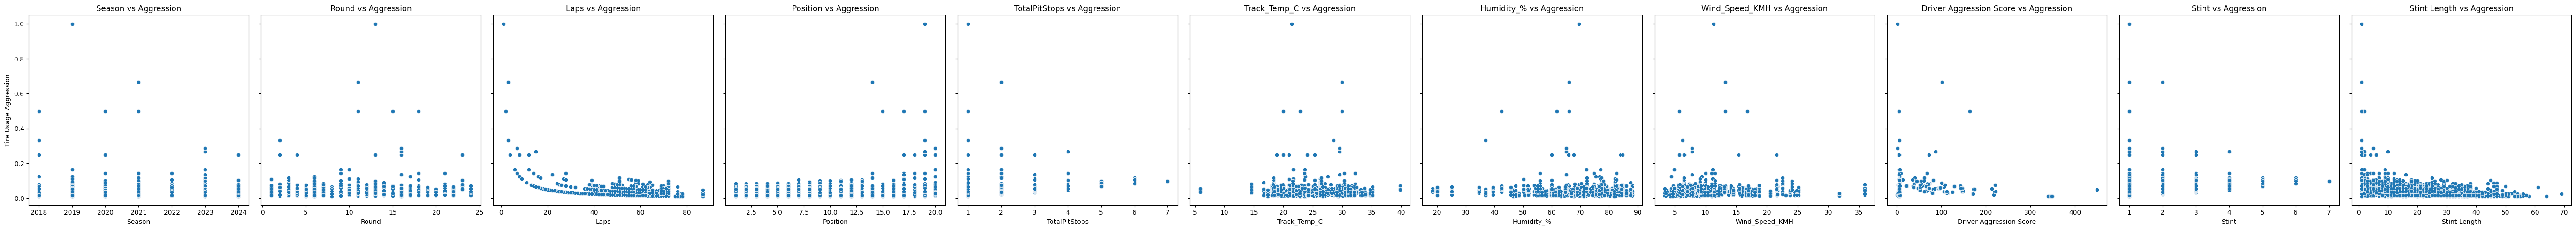

In [255]:
numeric_cols = f1.select_dtypes(include='number').columns
x_vars = [col for col in numeric_cols if col != 'Tire Usage Aggression']

# Controlla se ci sono abbastanza variabili da visualizzare
n = len(x_vars)
if n > 0:
    # Imposta il layout della figura
    fig, axes = plt.subplots(1, n, figsize=(5 * n, 5), sharey=True)

    # Scatterplot di ogni variabile rispetto al Driver Aggression Score
    for i, var in enumerate(x_vars):
        sns.scatterplot(data=f1, x=var, y='Tire Usage Aggression', ax=axes[i])
        axes[i].set_title(f'{var} vs Aggression')
        axes[i].set_xlabel(var)

    axes[0].set_ylabel('Tire Usage Aggression')
    plt.tight_layout()
    plt.show()
else:
    print('Nessuna variabile numerica disponibile per il confronto con Driver Aggression Score')

## Linear model

In [256]:
numeric_cols

Index(['Season', 'Round', 'Laps', 'Position', 'TotalPitStops', 'Track_Temp_C',
       'Humidity_%', 'Wind_Speed_KMH', 'Tire Usage Aggression',
       'Driver Aggression Score', 'Stint', 'Stint Length'],
      dtype='object')

### Choose the first 3 variables that are more promising

In [257]:
# Target variable
target = 'Tire Usage Aggression'

results = []

# Looping every possible variable
for col in numeric_cols:
    X = sm.add_constant(f1[[col]])
    y = f1[target]
    
    model = sm.OLS(y, X).fit()
    
    results.append({
        'variable': col,
        'r_squared': model.rsquared,
        'p_value': model.pvalues[col]
    })

# Transforming data frame
results_df = pd.DataFrame(results)

# Ordering
top_r2_pval = results_df.sort_values(by='p_value', ascending=True).head(4)
worse_r2_pval = results_df.sort_values(by='p_value', ascending=False).head(3)


# Output
print("VARIABILI CON R² PIU' ALTO E p-value PIU BASSO:")
print(top_r2_pval)

print("\n\nVARIABILI CON R² PIU' BASSO E p-value PIU ALTO:\n")
print(worse_r2_pval)

VARIABILI CON R² PIU' ALTO E p-value PIU BASSO:
                 variable  r_squared        p_value
8   Tire Usage Aggression   1.000000   0.000000e+00
4           TotalPitStops   0.252695  2.386846e-276
2                    Laps   0.144398  6.365153e-149
11           Stint Length   0.107975  1.210893e-109


VARIABILI CON R² PIU' BASSO E p-value PIU ALTO:

         variable  r_squared   p_value
6      Humidity_%   0.000173  0.386197
7  Wind_Speed_KMH   0.001277  0.018644
1           Round   0.001984  0.003354


### Fit Linear Model: mdev = b0 + b1*TotalPitStops + e

In [258]:
X = pd.DataFrame({'intercept': np.ones(f1.shape[0]), 'TotalPitStops': f1['TotalPitStops']})
X[:4]

,intercept,TotalPitStops
0,1.0,1
2,1.0,1
4,1.0,1
6,1.0,1


In [259]:
y = f1[target]
model = sm.OLS(y, X) #function to fit a simple linear regression. Here we define the model
results = model.fit() #here we fit the model

In [260]:
print(results.summary())

significant_vars = results.pvalues[results.pvalues < 0.05]
print("\nVariabili significative (p-value < 0.05):")
print(significant_vars)

insignificant_vars = results.pvalues[results.pvalues >= 0.05]
print("\nVariabili insignificanti (p-value >= 0.05):")
print(insignificant_vars)

                              OLS Regression Results                             
Dep. Variable:     Tire Usage Aggression   R-squared:                       0.253
Model:                               OLS   Adj. R-squared:                  0.253
Method:                    Least Squares   F-statistic:                     1465.
Date:                   Tue, 22 Apr 2025   Prob (F-statistic):          2.39e-276
Time:                           21:34:30   Log-Likelihood:                 9159.0
No. Observations:                   4334   AIC:                        -1.831e+04
Df Residuals:                       4332   BIC:                        -1.830e+04
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept       

### Creating the input matrix using ModelSpec of ISLP package

In [261]:
model = MS(['TotalPitStops'])
model = model.fit(f1) 
X = model.transform(f1)
X[:4]

,intercept,TotalPitStops
0,1.0,1
2,1.0,1
4,1.0,1
6,1.0,1


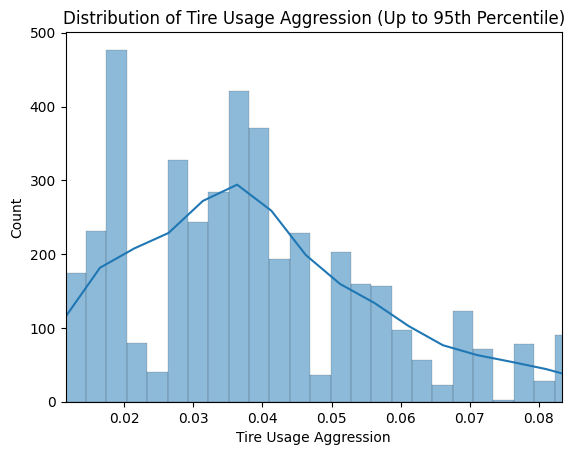

In [262]:
sns.histplot(y, kde=True)

plt.xlim(y.quantile(0.00), y.quantile(0.95))

plt.title('Distribution of Tire Usage Aggression (Up to 95th Percentile)')
plt.show()

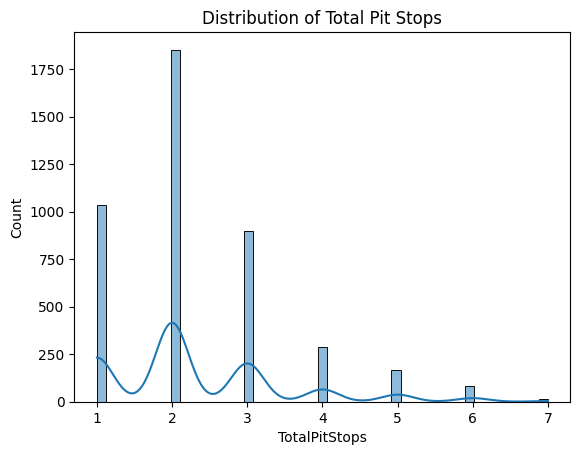

In [263]:
sns.histplot(f1['TotalPitStops'], kde=True)

plt.xticks(f1['TotalPitStops'].unique(), rotation=0)

plt.title('Distribution of Total Pit Stops')
plt.show()

In [264]:
# Get predictions on new input
new_df = pd.DataFrame({'TotalPitStops': [2, 3, 4, 5, 6, 7]})
new_X = model.transform(new_df)  # Aggiungi una colonna di 1 per l'intercetta
new_X

,intercept,TotalPitStops
0,1.0,2
1,1.0,3
2,1.0,4
3,1.0,5
4,1.0,6
5,1.0,7


In [265]:
New_X = sm.add_constant(new_df)
new_predictions = results.get_prediction(new_X)
predicted_means = new_predictions.predicted_mean
print(predicted_means)

[0.03796035 0.05260269 0.06724504 0.08188738 0.09652973 0.11117207]


In [266]:
#Confidence interval
new_predictions.conf_int(alpha=0.05)

array([[0.037059  , 0.0388617 ],
       [0.05158935, 0.05361604],
       [0.06570672, 0.06878336],
       [0.0796894 , 0.08408536],
       [0.09362784, 0.09943161],
       [0.10754773, 0.11479642]])

In [267]:
intercept = results.params.iloc[0]  # Intercetta (b)
slope = results.params.iloc[1]  # Pendenza (m)

formula = f"y = {slope:.4f} * TotalPitStops + {intercept:.4f}"

print("FORMULA del modello di regressione:", formula)

FORMULA del modello di regressione: y = 0.0146 * TotalPitStops + 0.0087


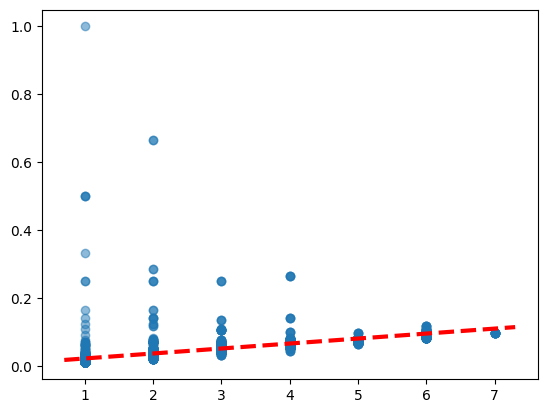

In [268]:
def abline(ax, b, m, *args, **kwargs):
    "Aggiungi una retta con pendenza m e intercetta b su ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

ax = plt.gca()
ax.scatter(f1['TotalPitStops'], f1['Tire Usage Aggression'], alpha=0.5)

abline(ax, intercept, slope, 'r--', linewidth=3)

plt.show()

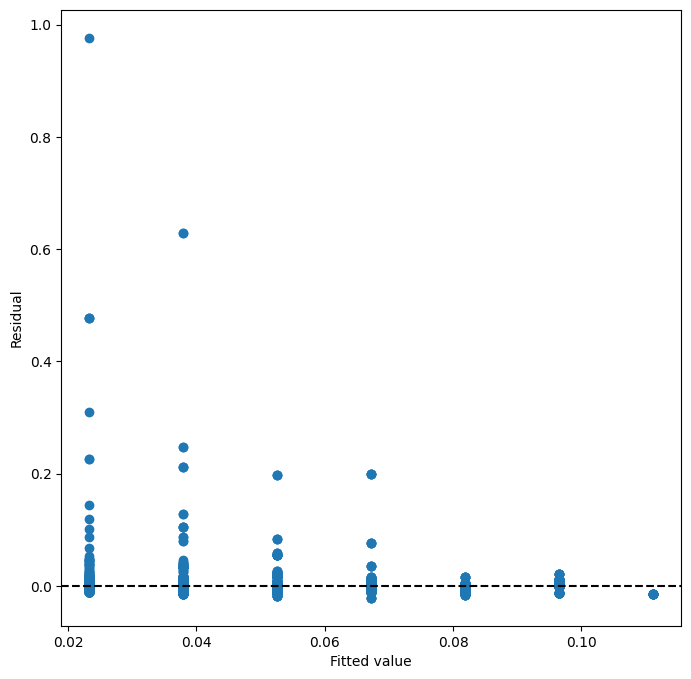

In [269]:
# Diagnostics plot (We observe non linearity)
fig, ax = plt.subplots(figsize=(8, 8)) 
ax.scatter(results.fittedvalues, results.resid)  # Scatter plot of fitted values vs residuals
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')  


3267

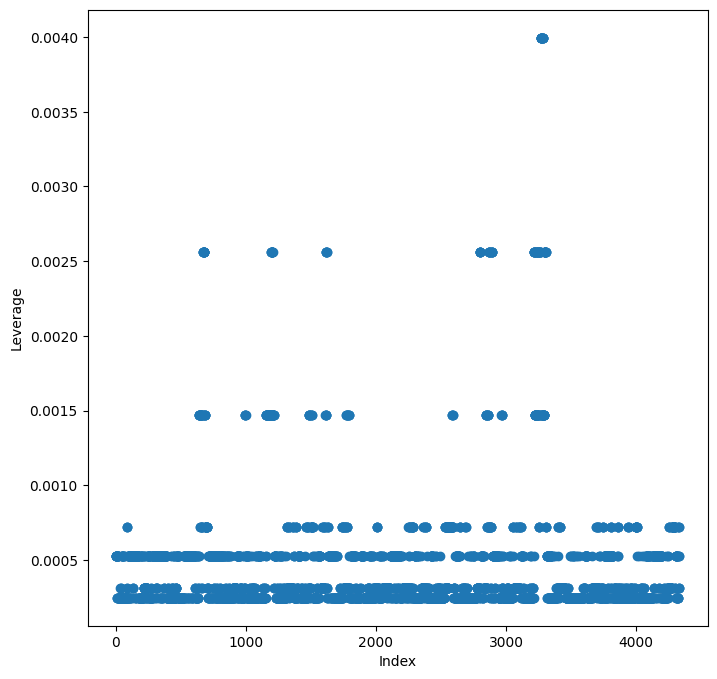

In [ ]:
# Compute leverage statistics
infl = results.get_influence()
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

# Multiple Linear Regression

In [271]:
# y = b*X + e (perform a regression using all of the predictors)
terms = numeric_cols.drop('Tire Usage Aggression')
print(terms)

Index(['Season', 'Round', 'Laps', 'Position', 'TotalPitStops', 'Track_Temp_C',
       'Humidity_%', 'Wind_Speed_KMH', 'Driver Aggression Score', 'Stint',
       'Stint Length'],
      dtype='object')


In [272]:
X = MS(terms).fit_transform(f1)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,0.506600,0.398000,1.274,0.203
Season,-0.000200,0.000000,-1.054,0.292
Round,0.000008,0.000067,0.126,0.900
Laps,-0.001500,0.000037,-39.312,0.000
Position,0.000200,0.000071,2.178,0.029
TotalPitStops,0.017100,0.000000,36.352,0.000
Track_Temp_C,0.000010,0.000077,0.136,0.891
Humidity_%,0.000022,0.000027,0.824,0.410
Wind_Speed_KMH,-0.000300,0.000063,-4.625,0.000
Driver Aggression Score,0.000022,0.000011,2.089,0.037


In [273]:
significant_vars = results.pvalues[results.pvalues < 0.05]
print("\nVariabili significative (p-value < 0.05):")
print(significant_vars)

insignificant_vars = results.pvalues[results.pvalues >= 0.05]
print("\nVariabili insignificanti (p-value >= 0.05):")
print(insignificant_vars)


Variabili significative (p-value < 0.05):
Laps                       2.973204e-289
Position                    2.946151e-02
TotalPitStops              1.057037e-252
Wind_Speed_KMH              3.854630e-06
Driver Aggression Score     3.672908e-02
dtype: float64

Variabili insignificanti (p-value >= 0.05):
intercept       0.202765
Season          0.291982
Round           0.899922
Track_Temp_C    0.891455
Humidity_%      0.409709
Stint           0.963588
Stint Length    0.420571
dtype: float64


In [274]:
# getting goodness of fit
print("R2", results.rsquared)
print("RSE", np.sqrt(results.scale))

R2 0.48874728314548177
RSE 0.02421839041354778


In [275]:
minus_var = terms.drop(['Season', 'Round', 'Track_Temp_C', 'Humidity_%', 'Stint', 'Stint Length'])
Xma = MS(minus_var).fit_transform(f1)
model1 = sm.OLS(y, Xma)
results1 = model1.fit()
summarize(results1)

,coef,std err,t,P>|t|
intercept,0.088800,0.002000,35.937,0.000
Laps,-0.001500,0.000035,-41.989,0.000
Position,0.000200,0.000070,2.151,0.031
TotalPitStops,0.017100,0.000000,50.347,0.000
Wind_Speed_KMH,-0.000300,0.000062,-4.743,0.000
Driver Aggression Score,0.000023,0.000010,2.264,0.024


In [276]:
significant_vars = results1.pvalues[results1.pvalues < 0.05]
print("\nVariabili significative (p-value < 0.05):")
print(significant_vars)

insignificant_vars = results1.pvalues[results1.pvalues >= 0.05]
print("\nVariabili insignificanti (p-value >= 0.05):")
print(insignificant_vars)


Variabili significative (p-value < 0.05):
intercept                  9.678906e-248
Laps                        0.000000e+00
Position                    3.149873e-02
TotalPitStops               0.000000e+00
Wind_Speed_KMH              2.169906e-06
Driver Aggression Score     2.361735e-02
dtype: float64

Variabili insignificanti (p-value >= 0.05):
Series([], dtype: float64)


In [277]:
print("R2", results1.rsquared)
print("RSE", np.sqrt(results1.scale))

R2 0.4884679807586534
RSE 0.024208207234864255


## Interaction Terms

In [278]:
# to introduce and interactions terms use a python tuple
X = MS(['lstat', 'age', ('lstat', 'age')]).fit_transform(Boston)
model2 = sm.OLS(y, X)
summarize(model2.fit())

NameError: name 'Boston' is not defined

## Non-linear Transformations of the Predictors

In [ ]:
# poly() function present in the package ISLP specifies that columns representing polynomial functions of its first argument are added to the model matrix
X = MS([poly('lstat', degree=2), 'age']).fit_transform(Boston)
model3 = sm.OLS(y, X)
results3 = model3.fit()
summarize(results3)

,coef,std err,t,P>|t|
intercept,17.7151,0.781,22.681,0.0
"poly(lstat, degree=2)[0]",-179.2279,6.733,-26.620,0.0
"poly(lstat, degree=2)[1]",72.9908,5.482,13.315,0.0
age,0.0703,0.011,6.471,0.0


## Qualitative predictors
Based on the Carseats dataset present in the package ISLP, will attempt to predict Sales (child car seat sales) in 400 locations based
on a number of predictors.

The Carseats data includes the qualitative predictor "ShelveLoc," which indicates the quality of the shelving location with three possible values: Bad, Medium, and Good.

In general for qualitative predictor the ModelSpec() generates one-hot encoding of the categorical variables automatically

In [ ]:
Carseats = load_data('Carseats')
Carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [ ]:
allvars = list(Carseats.columns.drop('Sales'))
y = Carseats['Sales']
final = allvars + [('Income', 'Advertising'),
('Price', 'Age')]
X = MS(final).fit_transform(Carseats)
model = sm.OLS(y, X)
summarize(model.fit())

,coef,std err,t,P>|t|
intercept,6.5756,1.009,6.519,0.000
CompPrice,0.0929,0.004,22.567,0.000
Income,0.0109,0.003,4.183,0.000
Advertising,0.0702,0.023,3.107,0.002
Population,0.0002,0.000,0.433,0.665
Price,-0.1008,0.007,-13.549,0.000
ShelveLoc[Good],4.8487,0.153,31.724,0.000
ShelveLoc[Medium],1.9533,0.126,15.531,0.000
Age,-0.0579,0.016,-3.633,0.000
Education,-0.0209,0.020,-1.063,0.288


# Cross Validation

### Validation set approach

In [ ]:
from functools import partial
from sklearn.model_selection import (cross_validate ,KFold ,ShuffleSplit)
from sklearn.base import clone
from ISLP.models import sklearn_sm #a wrapper that enables us to easily use the cross-validation tools of sklearn with models fit by statsmodels
from sklearn.model_selection import train_test_split

In [ ]:
Auto = load_data('Auto')
Auto_train , Auto_valid = train_test_split(Auto, test_size=196, random_state=0) # random_state is needed for reproducible result across run

In [ ]:
#fit a linear regression model
hp_mm = MS(['horsepower'])
X_train = hp_mm.fit_transform(Auto_train)
y_train = Auto_train['mpg']
model = sm.OLS(y_train , X_train)
results = model.fit()

In [ ]:
# evaluate the model using the MSE on the validation data
X_valid = hp_mm.transform(Auto_valid)
y_valid = Auto_valid['mpg']
valid_pred = results.predict(X_valid)
np.mean((y_valid - valid_pred)**2)

23.61661706966988

## Leave One-out Cross validation
The sklearn_sm() class takes a statsmodels model as its first argument. It also accepts two optional arguments: model_str for specifying a formula, and model_args, which is a dictionary containing additional arguments for fitting the model.

In [ ]:
hp_model = sklearn_sm(sm.OLS, MS(['horsepower']))
X, Y = Auto.drop(columns=['mpg']), Auto['mpg']

# This is a LOOCV because cv use the number of sample in our dataset, that is Auto.shape[0], making sure that each sample is use as a test set
cv_results = cross_validate(hp_model ,X, Y, cv=Auto.shape[0])
cv_err = np.mean(cv_results['test_score'])
cv_err

24.23151351792924

## K-Fold cross validation

In [ ]:
hp_model = sklearn_sm(sm.OLS, MS(['horsepower']))
X, Y = Auto.drop(columns=['mpg']), Auto['mpg']
kf = KFold(n_splits=10, shuffle=True, random_state=1)
cv_results = cross_validate(hp_model, X, Y, cv=kf)
cv_err = np.mean(cv_results['test_score'])
cv_err

24.09767573188305

# Exercise
Train and compare the performance of different cross-validation methods to identify the best model for polynomial regression with varying degrees using the Auto dataset.

https://scikit-learn.org/stable/

Fine